In [31]:
import sys
sys.path.append("../")
import pandas as pd
import calculate_model_metrics
import numpy as np
import random
import format_data as fd
import classify_generic as cg
import calculate_model_metrics as CM
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

random.seed(123)
np.random.seed(123)

In [2]:
#%cd ..

/Users/twood/Desktop/DLBCL-Classifier/src_python


In [3]:
staudt_maf = pd.read_csv('../data_tables/maf_files/MAF_NCICCR-DLBCL_phs001444.txt', sep='\t')
tcga_maf = pd.read_csv('../data_tables/maf_files/MAF_TCGA-DLBC_phs000178.txt', sep='\t')

staudt_maf.head()

,SUBJECT_NAME,dbGaP_ACCESSION,MUTATION_ID,CHROMOSOME,HG.19 POSITION,REF. NT,ALT. NT,ENTREZ_GENE_ID,GENE SYMBOL,EXEMPLAR ACCESSION,...,ANNOVAR_POP_FREQ_MAX,1000_Genome_ALL_Freq,EXAC_ALL_Freq,ESP_ALL_Freq,NCI60_Freq,COSMIC,SIFT_SCORE,SIFT_PRED,PP2_HDIV,PP2_HDIV_PRED
0,DLBCL11255,phs001444,225513,17,62006798,T,G,974,CD79B,NM_000626,...,0.0000,0.0,0.0,0.0,0.0,"ID=COSM220733;OCCURENCE=1(NS),3(haematopoietic...",0.00,D,1.000,D
1,DLBCL11255,phs001444,28031221,1,204438336,G,A,5287,PIK3C2B,NM_002646,...,0.0000,0.0,0.0,0.0,0.0,NaN,0.80,T,0.000,B
2,DLBCL11255,phs001444,28843675,7,99917588,C,T,441272,SPDYE3,NM_001004351,...,0.0000,0.0,0.0,0.0,0.0,NaN,0.04,D,NaN,NaN
3,DLBCL11255,phs001444,34801656,12,124074934,C,T,10959,TMED2,NM_006815,...,0.0002,0.0,0.0,0.0,0.0,NaN,0.24,T,0.089,B
4,DLBCL11255,phs001444,52880134,10,104899192,A,T,22978,NT5C2,NM_012229,...,0.0000,0.0,0.0,0.0,0.0,NaN,1.00,T,0.637,P


In [4]:
staudt_maf.shape

(50587, 27)

In [5]:
tcga_maf.head()

,SUBJECT_NAME,dbGaP_ACCESSION,MUTATION_ID,CHROMOSOME,HG.19 POSITION,REF. NT,ALT. NT,ENTREZ_GENE_ID,GENE SYMBOL,EXEMPLAR ACCESSION,...,ANNOVAR_POP_FREQ_MAX,1000_Genome_ALL_Freq,EXAC_ALL_Freq,ESP_ALL_Freq,NCI60_Freq,COSMIC,SIFT_SCORE,SIFT_PRED,PP2_HDIV,PP2_HDIV_PRED
0,TCGA-FA-A86F,phs000178,67771721,5,10387118,A,G,10299,MARCH6,NM_005885,...,0.0,0.0,0.0,0.0,0.0,NaN,1.00,T,0.005,B
1,TCGA-GR-A4D4,phs000178,67742332,16,30389972,G,C,1731,SEPT1,NM_052838,...,0.0,0.0,0.0,0.0,0.0,NaN,0.87,T,0.025,B
2,TCGA-FF-8042,phs000178,67863107,X,118797638,C,A,23157,SEPT6,NM_015129,...,0.0,0.0,0.0,0.0,0.0,NaN,0.02,D,NaN,NaN
3,TCGA-FF-8061,phs000178,67869319,7,35937935,A,G,989,SEPT7,NM_001011553,...,0.0,0.0,0.0,0.0,0.0,NaN,0.08,T,0.043,B
4,TCGA-G8-6324,phs000178,21258642,7,74542150,C,A,84163,GTF2IRD2,NM_173537,...,0.0,0.0,0.0,0.0,0.0,NaN,0.04,D,0.000,B


In [6]:
tcga_maf['gsm_name'] = tcga_maf['SUBJECT_NAME'].str.replace('TCGA', 'DLBC').str.replace('-', '_') + '_TP_NB'
tcga_maf['gsm_name'] = tcga_maf['gsm_name'].str.replace('DLBC_G8_6909_TP_NB', 'DLBC_G8_6909_TP_NBM')
tcga_maf['gsm_name'] = tcga_maf['gsm_name'].str.replace('DLBC_G8_6906_TP_NB', 'DLBC_G8_6906_TP_NBM')
tcga_maf['gsm_name'] = tcga_maf['gsm_name'].str.replace('DLBC_G8_6914_TP_NB', 'DLBC_G8_6914_TP_NBM')
tcga_maf['gsm_name'] = tcga_maf['gsm_name'].str.replace('DLBC_G8_6907_TP_NB', 'DLBC_G8_6907_TP_NBM')
tcga_maf['gsm_name']

0       DLBC_FA_A86F_TP_NB
1       DLBC_GR_A4D4_TP_NB
2       DLBC_FF_8042_TP_NB
3       DLBC_FF_8061_TP_NB
4       DLBC_G8_6324_TP_NB
               ...        
3751    DLBC_RQ_AAAT_TP_NB
3752    DLBC_RQ_AAAT_TP_NB
3753    DLBC_RQ_AAAT_TP_NB
3754    DLBC_RQ_AAAT_TP_NB
3755    DLBC_FA_A4XK_TP_NB
Name: gsm_name, Length: 3756, dtype: object

In [7]:
our_gsm = pd.read_csv('../data_tables/gsm/DLBCL.699.163drivers.Sep_23_2022.tsv', sep='\t', index_col=1)
our_gsm

,gene,DLBCL11470,DLBCL10900,DLBC_FF_A7CQ_TP_NB,DLBCL10462,DLBCL_RICOVER_1081,DLBCL_LS1098,DLBCL_RICOVER_299,DLBCL11558,DLBCL_C_D_1105_NULLPAIR,...,DLBCL11455,DLBCL_RICOVER_685,DLBCL_LS146,DLBCL_RICOVER_111,DLBCL_RICOVER_173,DLBCL11515,DLBCL10491,DLBCL_RICOVER_1046,DLBCL10547,DLBCL10998
classifier_name,,,,,,,,,,,,,,,,,,,,,
SV.BCL6,SV.BCL6,3,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTX1,DTX1,2,1,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,0,0,0
CD70,CD70,2,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TNFAIP3,TNFAIP3,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
NOTCH2,NOTCH2,0,0,0,2,0,0,0,0,2,...,0,0,2,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1Q32.1.AMP,1Q32.1.AMP,0,0,0,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
BCL11A,BCL11A,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
IRF4,IRF4,0,2,2,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,0


In [8]:
sample_set = pd.read_csv('../data_tables/sample_sets/ShippStaudtSets.purity0.2.txt', sep='\t', index_col=0)
staudt_samples = sample_set[sample_set['cohort'] == 'Staudt']
tcga_samples = sample_set[sample_set['cohort'] == 'TCGA']
shipp_samples = sample_set[sample_set['cohort'] == 'Shipp']

In [9]:
staudt_samples

,cohort,cohort_num
SampleName,,
DLBCL10450,Staudt,1
DLBCL10469,Staudt,1
DLBCL10497,Staudt,1
DLBCL10505,Staudt,1
DLBCL10538,Staudt,1
...,...,...
DLBCL11495,Staudt,1
DLBCL11500,Staudt,1
DLBCL11513,Staudt,1


In [10]:
mutation_rows = [x for x in our_gsm.index if '.AMP' not in x and '.DEL' not in x and 'SV.' not in x]
len(mutation_rows)

99

In [11]:
staudt_gsm = our_gsm.loc[:, our_gsm.columns.isin(staudt_samples.index)].copy(deep=True)
staudt_gsm.loc[mutation_rows, :] = 0
staudt_gsm

,DLBCL11470,DLBCL10900,DLBCL10462,DLBCL11558,DLBCL11447,DLBCL11685,DLBCL10881,DLBCL11482,DLBCL11590,DLBCL10529,...,DLBCL11571,DLBCL10967,DLBCL10947,DLBCL10989,DLBCL11469,DLBCL11455,DLBCL11515,DLBCL10491,DLBCL10547,DLBCL10998
classifier_name,,,,,,,,,,,,,,,,,,,,,
SV.BCL6,3,0,3,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
DTX1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CD70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TNFAIP3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOTCH2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1Q32.1.AMP,0,0,0,0,0,0,2,0,0,2,...,0,0,0,0,0,2,0,0,0,0
BCL11A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IRF4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
tcga_gsm = our_gsm.loc[:, our_gsm.columns.isin(tcga_samples.index)].copy(deep=True)
tcga_gsm.loc[mutation_rows, :] = 0
tcga_gsm

,DLBC_FF_A7CQ_TP_NB,DLBC_FF_A7CW_TP_NB,DLBC_FF_A7CR_TP_NB,DLBC_FF_8046_TP_NB,DLBC_FF_8042_TP_NB,DLBC_FF_8043_TP_NB,DLBC_FF_A7CX_TP_NB,DLBC_FF_8062_TP_NB
classifier_name,,,,,,,,
SV.BCL6,0,0,0,0,0,0,0,0
DTX1,0,0,0,0,0,0,0,0
CD70,0,0,0,0,0,0,0,0
TNFAIP3,0,0,0,0,0,0,0,0
NOTCH2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
X1Q32.1.AMP,0,0,0,0,0,0,0,0
BCL11A,0,0,0,0,0,0,0,0
IRF4,0,0,0,0,0,0,0,0


In [13]:
for idx, row in staudt_maf.iterrows():
    sample = row['SUBJECT_NAME']
    gene = row['GENE SYMBOL'].replace('-', '.')
    if sample not in staudt_gsm.columns or gene not in staudt_gsm.index:
        continue
    
    if row['GENE SYMBOL'] == 'MYD88':
        if row['AA CHANGE'] == 'L265P':
            staudt_gsm.loc['MYD88.L265P', sample] = 2
        else:
            staudt_gsm.loc['MYD88.OTHER', sample] = 2
    
    staudt_gsm.loc[gene, sample] = 2

In [14]:
for idx, row in tcga_maf.iterrows():
    sample = row['gsm_name']
    gene = row['GENE SYMBOL'].replace('-', '.')
    if sample not in tcga_gsm.columns or gene not in tcga_gsm.index:
        continue
    
    if row['GENE SYMBOL'] == 'MYD88':
        if row['AA CHANGE'] == 'L265P':
            tcga_gsm.loc['MYD88.L265P', sample] = 2
        else:
            tcga_gsm.loc['MYD88.OTHER', sample] = 2
    
    tcga_gsm.loc[gene, sample] = 2

In [15]:
staudt_gsm.index[staudt_gsm.sum(axis=1) == 0]

Index(['IGLL5'], dtype='object', name='classifier_name')

In [16]:
tcga_gsm.index[staudt_gsm.sum(axis=1) == 0]

Index(['IGLL5'], dtype='object', name='classifier_name')

In [17]:
staudt_gsm

,DLBCL11470,DLBCL10900,DLBCL10462,DLBCL11558,DLBCL11447,DLBCL11685,DLBCL10881,DLBCL11482,DLBCL11590,DLBCL10529,...,DLBCL11571,DLBCL10967,DLBCL10947,DLBCL10989,DLBCL11469,DLBCL11455,DLBCL11515,DLBCL10491,DLBCL10547,DLBCL10998
classifier_name,,,,,,,,,,,,,,,,,,,,,
SV.BCL6,3,0,3,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
DTX1,2,0,0,0,0,0,0,2,0,0,...,0,0,2,0,0,0,0,0,0,2
CD70,2,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
TNFAIP3,2,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
NOTCH2,0,0,2,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1Q32.1.AMP,0,0,0,0,0,0,2,0,0,2,...,0,0,0,0,0,2,0,0,0,0
BCL11A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IRF4,0,2,0,0,0,0,2,0,0,0,...,0,2,0,0,0,2,0,0,0,0


In [18]:
tcga_gsm

,DLBC_FF_A7CQ_TP_NB,DLBC_FF_A7CW_TP_NB,DLBC_FF_A7CR_TP_NB,DLBC_FF_8046_TP_NB,DLBC_FF_8042_TP_NB,DLBC_FF_8043_TP_NB,DLBC_FF_A7CX_TP_NB,DLBC_FF_8062_TP_NB
classifier_name,,,,,,,,
SV.BCL6,0,0,0,0,0,0,0,0
DTX1,0,0,0,0,0,2,0,0
CD70,0,0,0,0,0,0,0,0
TNFAIP3,0,0,2,0,0,0,2,0
NOTCH2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
X1Q32.1.AMP,0,0,0,0,0,0,0,0
BCL11A,0,0,2,0,0,0,0,0
IRF4,2,0,2,0,0,0,0,0


In [19]:
staudt_ours = our_gsm.loc[:, (our_gsm.columns.isin(staudt_samples.index) | \
                             (our_gsm.columns.isin(tcga_samples.index)))].copy(deep=True)
staudt_ours

,DLBCL11470,DLBCL10900,DLBC_FF_A7CQ_TP_NB,DLBCL10462,DLBCL11558,DLBCL11447,DLBCL11685,DLBCL10881,DLBCL11482,DLBCL11590,...,DLBCL11571,DLBCL10967,DLBCL10947,DLBCL10989,DLBCL11469,DLBCL11455,DLBCL11515,DLBCL10491,DLBCL10547,DLBCL10998
classifier_name,,,,,,,,,,,,,,,,,,,,,
SV.BCL6,3,0,0,3,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
DTX1,2,1,0,0,0,0,0,0,2,0,...,0,0,0,0,0,1,0,0,0,0
CD70,2,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
TNFAIP3,2,0,0,2,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,2,2
NOTCH2,0,0,0,2,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1Q32.1.AMP,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,2,0,0,0,0
BCL11A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IRF4,0,2,2,0,0,0,0,2,0,0,...,0,0,0,0,0,2,0,0,0,0


In [20]:
labels = pd.read_csv('../data_tables/confidence_tables/baseline_probabilities.connectivity_based.sensitivity_power2.Sep_23_2022.tsv',
                    sep='\t', index_col=0)
labels['cluster'] = 'C' + labels['cluster'].astype(str)
labels

,C1,C2,C3,C4,C5,cluster,confidence
DLBCL10877,0.985597,0.002210,0.000684,0.010885,0.000625,C1,0.985597
DLBCL10928,0.984814,0.001006,0.000431,0.013195,0.000553,C1,0.984814
DLBCL_MC_F648_JKW,0.984740,0.003482,0.000594,0.010454,0.000730,C1,0.984740
DLBCL10844,0.984523,0.000563,0.000372,0.011383,0.003159,C1,0.984523
DLBCL11501,0.983851,0.002258,0.000601,0.012017,0.001273,C1,0.983851
...,...,...,...,...,...,...,...
DLBCL_C_D_PAIR20,0.000572,0.025097,0.384317,0.002925,0.587090,C5,0.587090
DLBCL11504,0.159420,0.000438,0.000508,0.264150,0.575484,C5,0.575484
DLBCL_RICOVER_150,0.000390,0.463520,0.000404,0.002014,0.533672,C5,0.533672
DLBCL11538,0.003331,0.000994,0.228558,0.235071,0.532045,C5,0.532045


In [21]:
test_set = list(pd.read_csv('../data_tables/train_test_sets/TestingSet_149Subset_May2021.txt', 
                            sep='\t', index_col=0, header=None).index)
train_set = list(pd.read_csv('../data_tables/train_test_sets/TrainingSet_550Subset_May2021.txt', 
                             sep='\t', index_col=0, header=None).index)

len(test_set), len(train_set)

(149, 550)

In [22]:
staudt_tcga_gsm = pd.concat([staudt_gsm, tcga_gsm], axis=1)
staudt_tcga_gsm

,DLBCL11470,DLBCL10900,DLBCL10462,DLBCL11558,DLBCL11447,DLBCL11685,DLBCL10881,DLBCL11482,DLBCL11590,DLBCL10529,...,DLBCL10547,DLBCL10998,DLBC_FF_A7CQ_TP_NB,DLBC_FF_A7CW_TP_NB,DLBC_FF_A7CR_TP_NB,DLBC_FF_8046_TP_NB,DLBC_FF_8042_TP_NB,DLBC_FF_8043_TP_NB,DLBC_FF_A7CX_TP_NB,DLBC_FF_8062_TP_NB
classifier_name,,,,,,,,,,,,,,,,,,,,,
SV.BCL6,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTX1,2,0,0,0,0,0,0,2,0,0,...,0,2,0,0,0,0,0,2,0,0
CD70,2,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
TNFAIP3,2,0,2,0,0,0,0,0,0,0,...,2,2,0,0,2,0,0,0,2,0
NOTCH2,0,0,2,0,0,0,0,2,0,0,...,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1Q32.1.AMP,0,0,0,0,0,0,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
BCL11A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
IRF4,0,2,0,0,0,0,2,0,0,0,...,0,0,2,0,2,0,0,0,0,0


In [23]:
sets = (test_set, train_set, test_set+train_set)
sets_name = ('test_n=65', 'train_n=357', 'all_n=422')

all_gsms = [staudt_ours, staudt_tcga_gsm]
all_gsms_name = ['staudt_ours', 'staudt_raw']

In [24]:
classified_sets = {}

for i, s in enumerate(sets):
    for j, g in enumerate(all_gsms):
        curr_gsm = g.loc[:, g.columns.isin(s)]
        
        reduced_curr_gsm = fd.construct_reduced_winning_version(curr_gsm)
        classified_samples_curr = cg.classify_samples_winning_model(reduced_curr_gsm)
        classified_samples_curr.index.name = 'sample'
        classified_samples_curr['PredictedCluster'] = classified_samples_curr['PredictedCluster'].map({
                                                                                                        1.0: 'C1', 
                                                                                                        2.0: 'C2', 
                                                                                                        3.0: 'C3', 
                                                                                                        4.0: 'C4', 
                                                                                                        5.0: 'C5'})
        classified_samples_curr['TrueCluster'] = labels.loc[classified_samples_curr.index, 'cluster']
        classified_samples_curr = classified_samples_curr.sort_values(by='Confidence')
        full_name = all_gsms_name[j] + '_' + sets_name[i]
        classified_sets[full_name] = classified_samples_curr
        classified_samples_curr.to_csv('../evaluation_panel_sets/' + full_name, 
                                       sep='\t', index=True)

loaded


../nn.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


loaded
loaded


../classify_generic.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_df[idx] = average_output


loaded
loaded
loaded


In [25]:
performances_all = pd.DataFrame(columns=['accuracy', 'lowerAcc', 'upperAcc', 
                                         'kappa', 'lowerKappa', 'upperKappa',
                                         'performance', 'lowerPerformance', 'upperPerformance'])

In [26]:
# staudt our calls results

for k in classified_sets:
    classified_samples_curr = classified_sets[k]
    lrx = np.array(classified_samples_curr['Confidence'])
    lry = np.array(np.equal(classified_samples_curr['PredictedCluster'], 
                                        classified_samples_curr['TrueCluster']).astype(int))
    CM.modelKappa(lrx, lry,
                  num_iter=1,
                  computeplots=True,
                  savefilename='../plots/xyresiduals/' + k)

    acc, lower_acc, upper_acc = CM.modelAccuracy(classified_samples_curr['PredictedCluster'], 
                                                 classified_samples_curr['TrueCluster'])

    kappa, lower_kappa, upper_kappa = CM.modelKappa(lrx, 
                                                    lry)

    p, lower_p, upper_p = CM.modelPerformance(acc, kappa, 
                                              lower_acc, upper_acc, 
                                              lower_kappa, upper_kappa)


    performances_all.loc[k] = [acc, lower_acc, upper_acc,
                               kappa, lower_kappa, upper_kappa,
                               p, lower_p, upper_p]


../correlation_plot.py:116: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  axs[2].set_ylim([0, upper_y])


In [27]:
performances_all

,accuracy,lowerAcc,upperAcc,kappa,lowerKappa,upperKappa,performance,lowerPerformance,upperPerformance
staudt_ours_test_n=65,0.907692,0.858738,0.932217,0.892701,0.868186,0.917216,0.904654,0.848797,0.940202
staudt_raw_test_n=65,0.938462,0.894063,0.956576,0.914826,0.899034,0.930618,0.933637,0.885655,0.958302
staudt_ours_train_n=357,0.941176,0.926137,0.951297,0.901779,0.893400,0.910158,0.933024,0.915419,0.946554
staudt_raw_train_n=357,0.871148,0.851316,0.886843,0.875659,0.863570,0.887747,0.872047,0.848372,0.892230
staudt_ours_all_n=422,0.936019,0.921958,0.945964,0.908716,0.901607,0.915825,0.930428,0.914346,0.942954
staudt_raw_all_n=422,0.881517,0.863952,0.895480,0.884465,0.872314,0.896616,0.882105,0.860334,0.900966


In [28]:
xerr=performances_all[['lowerPerformance', 'upperPerformance']]
xerr.loc[:, 'lowerPerformance'] = performances_all.loc[:, 'performance'] - xerr.loc[:, 'lowerPerformance']
xerr.loc[:, 'upperPerformance'] = xerr.loc[:, 'upperPerformance'] - performances_all.loc[:, 'performance']
xerr = xerr.values.T
xerr

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


array([[0.0558568 , 0.04798259, 0.01760456, 0.02367506, 0.0160821 ,
        0.02177062],
       [0.03554838, 0.02466425, 0.01353017, 0.02018284, 0.01252601,
        0.01886115]])

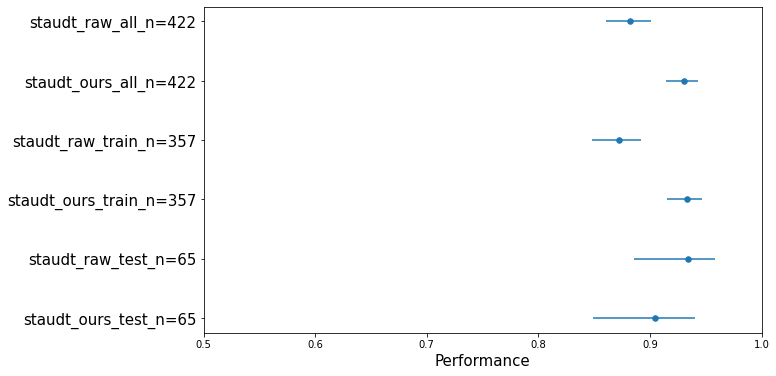

In [30]:
plt.rcParams["figure.figsize"] = (10,6)
plt.errorbar(performances_all['performance'], performances_all.index, ls='none', marker='.', xerr=xerr)
plt.scatter(performances_all['performance'], performances_all.index, s=30)
plt.xlabel('Performance', size=15)
plt.xlim([0.5, 1])
plt.yticks(size=15)
plt.savefig('../plots/paper_figures/staudt_all_subsets_performanes.pdf')
plt.show()

In [150]:
print('# correct raw calls:', sum(lry_staudt_raw), '/', len(lry_staudt_raw))
print('# correct our calls:', sum(lry_staudt_ours), '/', len(lry_staudt_ours))

# correct raw calls: 61 / 65
# correct our calls: 59 / 65


In [33]:
classified_sets.keys()

dict_keys(['staudt_ours_test_n=65', 'staudt_raw_test_n=65', 'staudt_ours_train_n=357', 'staudt_raw_train_n=357', 'staudt_ours_all_n=422', 'staudt_raw_all_n=422'])

In [34]:
classified_sets['staudt_ours_test_n=65']

,C1,C2,C3,C4,C5,Confidence,PredictedCluster,TrueCluster
sample,,,,,,,,
DLBCL10538,0.044105,0.364438,0.032707,0.241779,0.316971,0.364438,C2,C2
DLBCL11005,0.035809,0.285118,0.039919,0.200089,0.439066,0.439066,C5,C4
DLBCL10470,0.041818,0.215618,0.262551,0.440343,0.039670,0.440343,C4,C2
DLBCL10531,0.099739,0.083338,0.077659,0.474522,0.264742,0.474522,C4,C1
DLBCL10500,0.029459,0.330171,0.080541,0.074177,0.485651,0.485651,C5,C2
...,...,...,...,...,...,...,...,...
DLBCL11508,0.992689,0.000997,0.001201,0.003640,0.001473,0.992689,C1,C1
DLBCL11579,0.000956,0.995045,0.001692,0.001184,0.001123,0.995045,C2,C2
DLBCL10507,0.000373,0.998383,0.000540,0.000311,0.000393,0.998383,C2,C2


In [37]:
set(classified_sets['staudt_ours_test_n=65']['PredictedCluster'])

{'C1', 'C2', 'C3', 'C4', 'C5'}

In [40]:
classified_sets['staudt_ours_test_n=65']['TrueCluster'].value_counts()

C2    22
C1    13
C5    11
C4    10
C3     9
Name: TrueCluster, dtype: int64

In [41]:
classified_sets['staudt_ours_test_n=65']['PredictedCluster'].value_counts()

C2    20
C5    13
C4    13
C1    10
C3     9
Name: PredictedCluster, dtype: int64

In [44]:
map_dict = {'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5}

In [47]:
cm = confusion_matrix(classified_sets['staudt_ours_test_n=65']['TrueCluster'].map(map_dict), 
                      classified_sets['staudt_ours_test_n=65']['PredictedCluster'].map(map_dict))
cm

array([[10,  0,  0,  3,  0],
       [ 0, 20,  0,  1,  1],
       [ 0,  0,  9,  0,  0],
       [ 0,  0,  0,  9,  1],
       [ 0,  0,  0,  0, 11]])

In [49]:
for s in classified_sets:
    print(s)

staudt_ours_test_n=65
staudt_raw_test_n=65
staudt_ours_train_n=357
staudt_raw_train_n=357
staudt_ours_all_n=422
staudt_raw_all_n=422


In [51]:
sum(classified_sets[s]['TrueCluster'] == classified_sets[s]['PredictedCluster']) / classified_sets[s]['PredictedCluster'].shape[0]


0.8815165876777251

In [55]:
name = 'staudt_subsets_confusionmatrices'

with open('../data_tables/confusion_matrices/staudt_subsets/confusionmatrices_' + name + '.txt', 'w+') as confF:
    confF.write('Format: TRUE labels in ROWS, PREDICTED labels in COLUMNS\n')
    for s in classified_sets:
        cm = confusion_matrix(classified_sets[s]['TrueCluster'].map(map_dict), 
                      classified_sets[s]['PredictedCluster'].map(map_dict))
        print(s)
        acc = sum(classified_sets[s]['TrueCluster'] == classified_sets[s]['PredictedCluster']) \
        / classified_sets[s]['PredictedCluster'].shape[0]
        confF.write(s + '\n')
        writestr = np.array2string(cm, separator='\t')
        writestr = writestr.replace('[', ' ')
        writestr = writestr.replace(']', ' ')
        confF.write(writestr)
        confF.write('\naccuracy: ' + str(acc))
        confF.write('\n\n')

staudt_ours_test_n=65
staudt_raw_test_n=65
staudt_ours_train_n=357
staudt_raw_train_n=357
staudt_ours_all_n=422
staudt_raw_all_n=422


In [43]:
classified_sets['staudt_ours_test_n=65']['TrueCluster'].map({'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5})

sample
DLBCL10538    2
DLBCL11005    4
DLBCL10470    2
DLBCL10531    1
DLBCL10500    2
             ..
DLBCL11508    1
DLBCL11579    2
DLBCL10507    2
DLBCL11438    2
DLBCL10477    2
Name: TrueCluster, Length: 65, dtype: int64